In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_800ppc/'
deck = 'KH_200ppc_200wci/'


dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

lx = np.linspace(0, info['Lx/di'], int(info['nx']))
ly = np.linspace(0, info['Ly/di'], int(info['ny']))

In [3]:
ds = tb.load_vars(dirs, times[0])
el = tb.load_vars(dirs, times[0], 'electron')
ion = tb.load_vars(dirs, times[0], 'ion')
jx = el['jx'] + ion['jx']
jy = el['jy'] + ion['jy']
jz = el['jz'] + ion['jz']

In [4]:
# fig, axs = plt.subplots(3,3, figsize=(12, 6), sharex = True, layout='constrained')
# seis = 'seismic'

# cm0 = axs[0,0].pcolormesh(ly,lx,el['jx']/el['rho'], cmap = seis, vmin = -0.1, vmax = 0.1) 
# cm1 = axs[1,0].pcolormesh(ly,lx,el['jy']/el['rho'], cmap = seis, vmin = -0.1, vmax = 0.1) 
# cm2 = axs[2,0].pcolormesh(ly,lx,el['jz']/el['rho'], cmap = seis, vmin = -0.1, vmax = 0.1)
# cm3 = axs[0,1].pcolormesh(ly,lx,ds['ex'], cmap = seis, vmin = -0.1, vmax = 0.1) 
# cm4 = axs[1,1].pcolormesh(ly,lx,ds['ey'], cmap = seis, vmin = -0.1, vmax = 0.1) 
# cm5 = axs[2,1].pcolormesh(ly,lx,ds['ez'], cmap = seis, vmin = -0.1, vmax = 0.1)
# cm6 = axs[0,2].pcolormesh(ly,lx,ds['cbx'], cmap = seis, vmin = -1, vmax = 1) 
# cm7 = axs[1,2].pcolormesh(ly,lx,ds['cby'], cmap = seis, vmin = -1, vmax = 1) 
# cm8 = axs[2,2].pcolormesh(ly,lx,ds['cbz'], cmap = seis, vmin = -1, vmax = 1)

# fig.colorbar(cm0, label = r'$U_x^e$')
# fig.colorbar(cm1, label = r'$U_y^e$')
# fig.colorbar(cm2, label = r'$U_z^e$')

# fig.colorbar(cm3, label = r'$E_x$')
# fig.colorbar(cm4, label = r'$E_y$')
# fig.colorbar(cm5, label = r'$E_z$')

# fig.colorbar(cm6, label = r'$B_x$')
# fig.colorbar(cm7, label = r'$B_y$')
# fig.colorbar(cm8, label = r'$B_z$')

# plt.savefig(figs + 'initial.png')

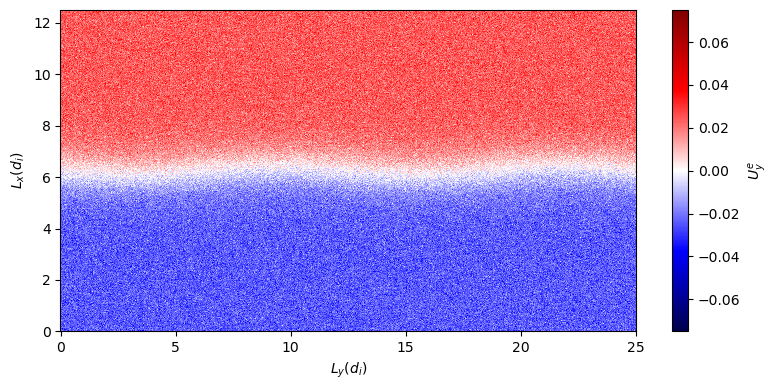

In [26]:
fig, axs = plt.subplots(figsize=(8, 4), sharex = True, layout='tight')
ux = el['jx']/el['rho']
uy = el['jy']/el['rho']
uz = el['jy']/el['rho']
u = np.sqrt(ux**2 + uy**2 + uz**2)
cm1 = axs.pcolormesh(ly,lx, uy, cmap = 'seismic', vmin = -0.075, vmax = 0.075) 
fig.colorbar(cm1, label = r'$U_y^e$')
axs.set_xlabel(r'$L_y (d_i)$')
axs.set_ylabel(r'$L_x (d_i)$')
plt.savefig(figs + 'uy_init.png')